In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Práctica Aproximación a la calidad de datos

In [2]:
df = pd.read_csv('titulares_prestacion_alimentar-2023-08-01.csv')
df.head()

,persona_id,sexo,edad,provincia_id,provincia,departamento_id,departamento,monto_ultima_liquidacion,periodo_desde,periodo_hasta
0,413f389c-d94d-43d3-b00c-c58419562331,M,88,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2022-05-01,2023-04-01
1,330e50e9-ff39-44dc-a882-b3255c2c7395,M,90,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2020-03-01,2022-03-01
2,4c6be991-231f-4dc2-92c3-487819d2dd91,M,85,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2022-01-01,2022-05-01
3,20b21518-ac89-459a-88f8-d4aa2e48ae21,M,81,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2022-12-01,2023-01-01
4,6626c34f-9088-492f-a016-4f72fa8ddcea,M,72,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",34000,2021-05-01,2021-09-01


### a) Analizamos consistencia entre pares

Analizaremos provincia_id junto con provincia y departamento_id junto con departamento

In [3]:
df.groupby(['provincia', 'provincia_id']).size()

provincia               provincia_id
Buenos Aires            2                   281
                        6               1372951
Catamarca               10                34928
Chaco                   22               145446
Chubut                  26                40775
Ciudad de Buenos Aires  2                126813
Corrientes              18               115298
Córdoba                 14               285807
Entre Ríos              30               101245
Formosa                 34                65931
Jujuy                   38                74023
La Pampa                42                23742
La Rioja                46                33260
Mendoza                 50               166639
Misiones                54               141589
Neuquén                 58                48429
Río Negro               62                55504
Salta                   66               150081
San Juan                70                74525
San Luis                74                43003
San

Al analizar la salida anterior, podemos observar que Buenos Aires tiene dos identificadores de provincia posibles, que son 2 y 6. Sin embargo, es importante destacar que el identificador 2 también está asociado a Ciudad de Buenos Aires. Ahora, examinemos los registros que tienen el identificador de provincia 6 y que están relacionados con Buenos Aires para comprender mejor su contenido.

In [4]:
print(df[(df['provincia_id'] == 2) & (df['provincia'] == 'Buenos Aires')])
print(np.unique(df[(df['provincia_id'] == 2) & (df['provincia'] == 'Buenos Aires')]['departamento']))

                                   persona_id sexo  edad  provincia_id  \
3473615  47c0e820-db18-4985-8464-dae72c0db3b4    M    58             2   
3473616  1fbbb5c6-5382-41a5-81a0-43ad3f62fa57    M    52             2   
3473617  d734b6b7-4c4e-4807-bb19-529bf6124812    M    50             2   
3473618  be786704-9cee-4a7f-96e1-c9b2943ecd52    M    49             2   
3473619  11f5767d-3319-4338-b15d-c3b7c6eb0728    M    46             2   
...                                       ...  ...   ...           ...   
3473891  2700a00b-d924-41af-ad25-2db334799183    F    41             2   
3473892  f6f321c9-0515-4f9e-abf9-6b2832f7b617    F    36             2   
3473893  220db70b-7753-402b-9802-5e894c1d26c4    F    34             2   
3473894  b81e84a8-e76d-4a09-990a-8912c3aa5c0b    F    24             2   
3473895  841511d9-baf8-4638-bb7c-d79a308cd690    F    32             2   

            provincia  departamento_id departamento  monto_ultima_liquidacion  \
3473615  Buenos Aires         

Observamos que en aquellos registros en los que el valor del identificador de provincia es 2, con Buenos Aires como provincia correspondiente, el departamento exclusivamente mencionado es Lezama.

Pasemos a analizar departamento_id y departamento

In [5]:
inconsistent_pairs = df.groupby('departamento')['departamento_id'].nunique().reset_index()
print(inconsistent_pairs[inconsistent_pairs['departamento_id'] > 1])


                      departamento  departamento_id
3                       25 de Mayo                5
4                       9 de Julio                5
5                    Adolfo Alsina                2
11                 Almirante Brown                2
24                      Avellaneda                3
25                        Ayacucho                2
33                        Belgrano                3
39                         Bermejo                2
55                         Capital               11
69                       Chacabuco                3
84                           Colón                3
91                      Concepción                2
100               Coronel Pringles                2
133            Florentino Ameghino                2
142                 General Alvear                3
145               General Belgrano                3
148                 General Güemes                2
160                    General Paz                2
164         

En el contexto de las relaciones entre departamento y departamento_id, es evidente que los nombres de los departamentos tienden a repetirse con mayor frecuencia. Esto se debe principalmente a la naturaleza de los departamentos, ya que en diferentes provincias es común encontrar departamentos con nombres idénticos o similares. Mas adelante analizaremos la unicidad de la jerarquia entre provincia y departamento. Por ahora veremos cuantas jerarquias distintas existen.

In [6]:
temp = df.apply(lambda row: f"{row['provincia']}, {row['departamento']}", axis=1)
print(f'Jerarquias distintas: {temp.nunique()}')

Jerarquias distintas: 516


### b) Generar una nueva variable que se llame duración, que represente el período durante el cual se accedió al beneficio.

In [7]:
df['duracion'] = pd.to_datetime(df['periodo_hasta']) - pd.to_datetime(df['periodo_desde'])

df['duracion']

0          335 days
1          730 days
2          120 days
3           31 days
4          123 days
             ...   
3675999    822 days
3676000    578 days
3676001    671 days
3676002   1126 days
3676003    579 days
Name: duracion, Length: 3676004, dtype: timedelta64[ns]

### c) Efectuar una apreciación sobre la unicidad, la actualidad y la consistencia del dataset. Para la consistencia verificar si es posible utilizar datasets externos.

In [8]:
# Unicidad
print(f'Numero total de registro: {len(df)} vs Numero de personas unicas: {df["persona_id"].nunique()}') # Numero total de registros

# Duplicados
print("Duplicados ----")
print(df[df.duplicated(['persona_id', 'periodo_desde', 'periodo_hasta'])])
print("-----------------")

# Valores nulos
print("Valores nulos ----")
print(df.isnull().sum())
print("-----------------")

# Valores nulos por columna
print("Valores nulos por columna ----")
print(df.isnull().sum(axis = 0))
print("-----------------")

"""
Al analizar los datos, se observa que no se encuentran valores nulos en ninguna de las columnas.
Asi como tampoco registros duplicados.
"""

Numero total de registro: 3676004 vs Numero de personas unicas: 3676004
Duplicados ----
Empty DataFrame
Columns: [persona_id, sexo, edad, provincia_id, provincia, departamento_id, departamento, monto_ultima_liquidacion, periodo_desde, periodo_hasta, duracion]
Index: []
-----------------
Valores nulos ----
persona_id                  0
sexo                        0
edad                        0
provincia_id                0
provincia                   0
departamento_id             0
departamento                0
monto_ultima_liquidacion    0
periodo_desde               0
periodo_hasta               0
duracion                    0
dtype: int64
-----------------
Valores nulos por columna ----
persona_id                  0
sexo                        0
edad                        0
provincia_id                0
provincia                   0
departamento_id             0
departamento                0
monto_ultima_liquidacion    0
periodo_desde               0
periodo_hasta               0
d

'\nAl analizar los datos, se observa que no se encuentran valores nulos en ninguna de las columnas.\nAsi como tampoco registros duplicados.\n'

Para analizar la consistencia vamos a comparar la distribucion porcentual de las tarjetas alimentar con la distribucion poblacional resultante del censo 2022.

In [9]:
distribucion_poblacional = pd.read_json('distribucion_poblacional.json', orient='index')

# Reset the index and rename the columns
distribucion_poblacional = distribucion_poblacional.reset_index().rename(columns={'index': 'provincia', 0: 'porcentaje_poblacion'})
distribucion_poblacional

,provincia,porcentaje_poblacion
0,Buenos Aires,38.16
1,Córdoba,8.64
2,Santa Fe,7.72
3,Ciudad de Buenos Aires,6.78
4,Mendoza,4.38
5,Tucumán,3.70
6,Salta,3.13
7,Entre Ríos,3.10
8,Misiones,2.78
9,Corrientes,2.60


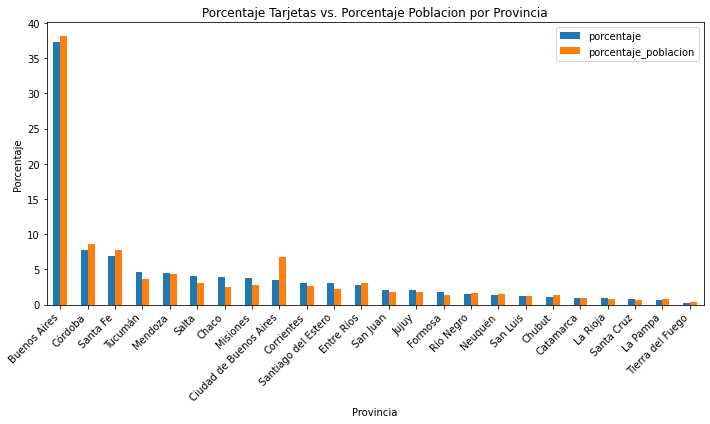

In [10]:
# Consistencia
counts = df['provincia'].value_counts()

provincia_percentages = (counts / len(df)) * 100

df_plot = pd.DataFrame({'provincia': provincia_percentages.index, 'porcentaje': provincia_percentages.values})

df_plot = df_plot.merge(pd.DataFrame.from_dict(distribucion_poblacional), on='provincia', how='inner')
df_plot

# Create a bar plot for 'porcentaje' and 'porcentaje_poblacion' columns
ax = df_plot.plot(kind='bar', figsize=(10, 6))
df_plot.set_index('provincia', inplace=True)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.title('Porcentaje Tarjetas vs. Porcentaje Poblacion por Provincia')
# Display province names on the x-axis
ax.set_xticklabels(df_plot.index, rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

Basándonos en el gráfico previo, es evidente que la distribución de las tarjetas alimentarias se asemeja a la distribución poblacional a nivel provincial en su mayoría. No obstante, hay excepciones notables, como es el caso de la Ciudad de Buenos Aires. Esto podría explicarse por las diferencias en los niveles de pobreza presentes en cada jurisdicción, siendo la Ciudad de Buenos Aires notablemente menos afectada por la pobreza en comparación con otras regiones. La inclusión de datos externos procedentes de otras fuentes relacionados con el salario promedio o los niveles de pobreza a nivel provincial o incluso municipal podría contribuir a perfeccionar la evaluación de la distribución en el conjunto de datos. 

### d) Efectuar un análisis descriptivo de cada una de las variables, incluyendo el % de datos faltantes

In [11]:
# persona_id
"""
El id de la persona es unico para cada persona, por es unico para cada registro de la tabla y todo registro tiene un id de persona.
En el contexto de esta tabla, el id parece estar anonimizado, ya que no se puede relacionar con ningun otro dato de la tabla para identificar a la persona. 
"""

print('Cantidad de persona_id distintos:', len(df['persona_id'].unique()), 'vs Cantidad de registros:', len(df))

Cantidad de persona_id distintos: 3676004 vs Cantidad de registros: 3676004


In [12]:
# sexo
"""
El sexo es unico para cada persona, por es unico para cada registro de la tabla y todo registro tiene un sexo
Es una variable categorica con tres posibles valores: F, M y X
El valor F es el mas frecuente
"""

print(df.sexo.value_counts() / len(df))
print('Cantidad de personas con sexo:', df.sexo.value_counts().sum(), 'vs Cantidad de registros:', len(df))


F    0.890871
M    0.109127
X    0.000002
Name: sexo, dtype: float64
Cantidad de personas con sexo: 3676004 vs Cantidad de registros: 3676004


count   3676004
mean         34
std           9
min           0
25%          27
50%          33
75%          40
max         123
Name: edad, dtype: float64
Cantidad de personas con edad: 3676004 vs Cantidad de registros: 3676004


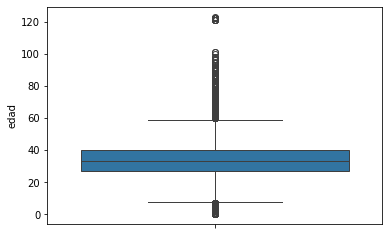

In [13]:
# edad

"""
La edad es unica para cada persona, es unico para cada registro de la tabla y todo registro tiene una edad
Es una variable numerica continua
El promedio de edad es de 34 años, la edad minima es de 0 años y la edad maxima es de 123 años
"""

pd.options.display.float_format = '{:.0f}'.format
print(df['edad'].describe())
sns.boxplot(df['edad'])
print('Cantidad de personas con edad:', df.edad.value_counts().sum(), 'vs Cantidad de registros:', len(df))

In [14]:
# provincia_id y provincia

"""
La provincia y provincia_id es unica para cada persona, es unico para cada registro de la tabla.
Es una variable categorica con 24 posibles valores
Describe la provincia de residencia de la persona
El valor mas frecuente es Buenos Aires
"""

print(df['provincia'].describe())
print('Cantidad de personas con provincia:', df.provincia.value_counts().sum(), 'vs Cantidad de registros:', len(df))

count          3676004
unique              24
top       Buenos Aires
freq           1373232
Name: provincia, dtype: object
Cantidad de personas con provincia: 3676004 vs Cantidad de registros: 3676004


In [15]:
# departamento_id y departamento

"""
La departamento y departamento_id es unica para cada persona, es unico para cada registro de la tabla
Es una variable categorica con 434 valores posibles que son jerarquicos con respecto a provincia.
Describe el departamento dentro dentro de la provincia de residencia de la persona

Existen 516 pares provincia y departamento distintos, siendo el par mas frecuente Buenos Aires, La Matanza
"""
temp = df.apply(lambda row: f"{row['provincia']}, {row['departamento']}", axis=1)
print(temp.describe())
print('Cantidad de personas con departamento:', df.provincia.value_counts().sum(), 'vs Cantidad de registros:', len(df))

count                      3676004
unique                         516
top       Buenos Aires, La Matanza
freq                        152406
dtype: object
Cantidad de personas con departamento: 3676004 vs Cantidad de registros: 3676004


count   3676004
mean      21316
std        6104
min       17000
25%       17000
50%       17000
75%       26000
max       34000
Name: monto_ultima_liquidacion, dtype: float64
17000    2322749
26000     892587
34000     460668
Name: monto_ultima_liquidacion, dtype: int64


<AxesSubplot:title={'center':'Porcentaje de registro por ultimo monto de liquidacion'}, xlabel='Monto Ultima Liquidacion', ylabel='Porcentaje de registros'>

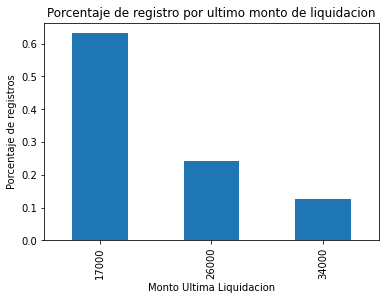

In [16]:
# monto_ultima_liquidacion

"""
El monto_ultima_liquidacion indica el monto de la ultima liquidacion de la persona en la provincia y periodo indicado
Es una variable numerica continua
No se observan valores nulos
vemos que hay tres valores posibles 17000, 26000 y 34000
"""

print(df['monto_ultima_liquidacion'].describe())

"""
Al ver un describe de la variable monto_ultima_liquidacion se observa que el valor minimo es 17000 y el valor maximo es 34000.
"""
mul_value_counts = df['monto_ultima_liquidacion'].value_counts()
print(mul_value_counts)
(mul_value_counts / len(df)).plot(
    kind='bar',
    xlabel='Monto Ultima Liquidacion',
    ylabel='Porcentaje de registros',
    title='Porcentaje de registro por ultimo monto de liquidacion'
)


In [17]:
# periodo_desde

"""
El periodo_desde indica la fecha de inicio de la liquidacion
La variable toma la forma de una fecha que indica el primer dia del mes.
Tiene 34 valores diferentes
"""

print(df['periodo_desde'].describe())
print(df['periodo_desde'].value_counts())
print('Cantidad de personas con periodo_desde:', df.periodo_desde.value_counts().sum(), 'vs Cantidad de registros:', len(df))

"""
Vemos que no hay datos nulos pero vemos que en ciertos meses no se iniciaron liquidaciones, por ejemplo 2022-08-01 y 2021-09-01 entre otros.
El valor mas frecuente es 2021-08-01
"""

# periodo_hasta

"""
El periodo_hasta indica la fecha de fin de la liquidacion
La variable toma la forma de una fecha que indica el primer dia del mes.
"""

print(df['periodo_hasta'].describe())
print(df['periodo_hasta'].value_counts())
print('Cantidad de personas con periodo_hasta:', df.periodo_desde.value_counts().sum(), 'vs Cantidad de registros:', len(df))

"""
El valor mas frecuente es 2023-08-01, que es el mes de la actualizacion de los datos
"""


count        3676004
unique            34
top       2021-05-01
freq          833042
Name: periodo_desde, dtype: object
2021-05-01    833042
2020-03-01    582280
2020-02-01    454661
2020-01-01    400567
2020-09-01    257093
2021-10-01    135216
2022-05-01    111723
2022-02-01    104494
2021-07-01     96667
2020-04-01     85269
2022-04-01     64079
2022-01-01     43649
2023-08-01     41784
2022-06-01     38507
2021-12-01     36308
2021-11-01     33632
2022-03-01     32987
2022-07-01     32137
2023-01-01     30097
2022-09-01     29423
2022-12-01     28994
2022-11-01     27549
2023-07-01     26591
2022-10-01     26038
2023-04-01     24530
2023-03-01     23393
2023-05-01     23159
2023-02-01     22476
2023-06-01     22273
2019-12-01      6920
2020-05-01       451
2021-06-01        13
2020-08-01         1
2020-10-01         1
Name: periodo_desde, dtype: int64
Cantidad de personas con periodo_desde: 3676004 vs Cantidad de registros: 3676004
count        3676004
unique            34
top      

'\nEl valor mas frecuente es 2023-08-01, que es el mes de la actualizacion de los datos\n'

In [18]:
# duracion

"""
La duracion es una variable calculada a partir de las variables periodo_desde y periodo_hasta
Vemos que la mediana de la duracion es de 822 dias.
El minimo es de 0 dias, por lo que hay personas que solo cobraron una vez.
"""

print(df['duracion'].describe())

count                        3676004
mean     770 days 08:33:10.590216928
std      451 days 07:35:41.716531680
min                  0 days 00:00:00
25%                365 days 00:00:00
50%                822 days 00:00:00
75%               1248 days 00:00:00
max               1339 days 00:00:00
Name: duracion, dtype: object


### e) Efectuar un análisis bivariado de los siguientes pares de variables

####a. Sexo vs. Monto_ultima_liquidacion
(Variable Nominal vs Variable Numérica)

In [19]:
"""
Teniendo en cuenta que analizamos que la variable monto_ultima_liquidacion toma solo tres valores posible consideramos que para el análisis
bivariado usariamos gráficos de barra y boxplot y no el histograma, ya que en este contexto armar un histograma por cada sexo sería lo mismo
que armar un gráfico de barras con el detalle de que en el histograma se desdibujaría la precisión de los datos al distribuirlos en rangos.
"""

#Seteamos variables para el gráfico de barras
s_groups = df['sexo'].unique()
groups_of_values = []
for s in s_groups:
    query = 'sexo == "{x}"'.format(x=s)
    query_res = df.query(query)
    monto_por_s= query_res.groupby(['monto_ultima_liquidacion']).size()
    groups_of_values.append(monto_por_s.values)

<AxesSubplot:>

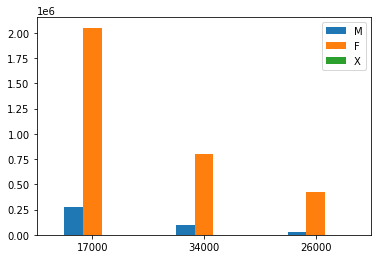

In [20]:
#Ploteamos gráfico de barras
plot_df = pd.DataFrame(groups_of_values, index=s_groups).T
plot_df = plot_df.set_axis(df['monto_ultima_liquidacion'].unique().tolist(), axis=0)
plot_df.plot.bar(rot= 0)

Podemos observar en este gráfico que para cada uno de los montos posibles la gran mayoría de las asignaciones de la tarjeta alimentar es para personas de sexo F. Los montos asignados a personas con sexo X son muy pocos en contraste con los otros dos sexos, de forma tal que ni se visualizan en el gráfico. A continuación analizamos esos casos puntuales para poder apreciar la situación de esos casos.

In [21]:
query_res = df.query('sexo == "X"')
print(query_res.groupby(['monto_ultima_liquidacion']).size())

monto_ultima_liquidacion
17000    5
26000    2
dtype: int64


Evidentemente son muy pocas las asignaciones a personas de sexo X. Para el monto de valor 34000 directamente no se registran beneficiaries.

La mediana de montos para el sexo F es 17000.0 y el promedio es 21410.696689461638
La mediana de montos para el sexo M es 17000.0 y el promedio es 20540.485900606254
La mediana de montos para el sexo X es 17000.0 y el promedio es 19571.428571428572


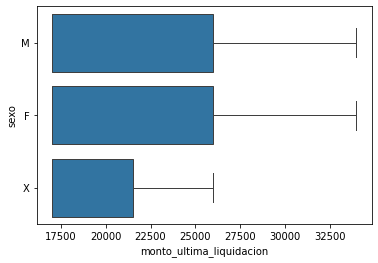

In [22]:
#Ploteamos boxplots
sns.boxplot(data=df, x="monto_ultima_liquidacion", y="sexo")

boxplot_df = df.query('sexo == "F"')
print("La mediana de montos para el sexo F es {mediana} y el promedio es {prom}".format(mediana = boxplot_df['monto_ultima_liquidacion'].median(),prom=boxplot_df['monto_ultima_liquidacion'].mean()))
boxplot_df = df.query('sexo == "M"')
print("La mediana de montos para el sexo M es {mediana} y el promedio es {prom}".format(mediana = boxplot_df['monto_ultima_liquidacion'].median(),prom=boxplot_df['monto_ultima_liquidacion'].mean()))
boxplot_df = df.query('sexo == "X"')
print("La mediana de montos para el sexo X es {mediana} y el promedio es {prom}".format(mediana = boxplot_df['monto_ultima_liquidacion'].median(),prom=boxplot_df['monto_ultima_liquidacion'].mean()))


Tanto para personas con sexo F como M el 50% de los montos de la ultima liquidacion de las asignaciones se encuentran entre 17000 y 26000. El box plot para el sexo X cambia debido a que no tiene valores mayores a 26000 asociados, y eso impacta en la distribución de cuartiles. La media para todos está en 17000 y por la distribución de los boxplot podemos concluir que para cada sexo el 75% de las asignaciones es de 17000, esto es lo que influencia que los promedios estén más cercanos a 17000 en todos los casos.

####b. Provincia vs. Duración
(Variable Nominal vs Variable Numérica)

La mediana de duracion para la provincia Ciudad de Buenos Aires es 641.0 y el promedio es 639.0919542949067
La mediana de duracion para la provincia Buenos Aires es 822.0 y el promedio es 777.360564711571
La mediana de duracion para la provincia San Juan es 822.0 y el promedio es 795.7656625293525
La mediana de duracion para la provincia Córdoba es 822.0 y el promedio es 750.459502391474
La mediana de duracion para la provincia Misiones es 822.0 y el promedio es 809.4083297431298
La mediana de duracion para la provincia Santa Fe es 822.0 y el promedio es 763.5180624200059
La mediana de duracion para la provincia Mendoza es 822.0 y el promedio es 759.4356663206092
La mediana de duracion para la provincia Catamarca es 822.0 y el promedio es 828.5729500687128
La mediana de duracion para la provincia Tucumán es 822.0 y el promedio es 782.2598893263932
La mediana de duracion para la provincia Formosa es 822.0 y el promedio es 831.7290652348668
La mediana de duracion para la provincia Chaco 

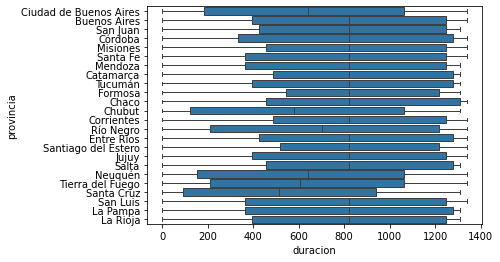

In [23]:
"""
Debido a la variedad de valores que toma la variable duracion consideramos que para el análisis bivariado usariamos boxplots e histogramas,
y no gráficos de barra ya que en este contexto armar un grafico de barras no sirve para sintetizar y ayudar a analizar la relación entre este
par de variables.
"""
#Ploteamos boxplots
df['duracion'] = df['duracion'].dt.days
sns.boxplot(data=df, x="duracion", y="provincia")

for p in df['provincia'].unique():
    query = 'provincia == "{x}"'.format(x=p)
    query_res = df.query(query)
    print("La mediana de duracion para la provincia {prov} es {mediana} y el promedio es {prom}".format(prov = p,mediana = query_res['duracion'].median(),prom = query_res['duracion'].mean()))


Podemos observar que para 18 de 24 provincias la mediana es la misma.
Particularmente para las provincias de la patagonia la distribución de la duración indica que las asignaciones tieneden a durar menos que para las otras provincias.


<ipython-input-24-ccb247f2b064>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4,4))


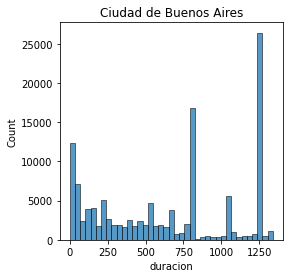

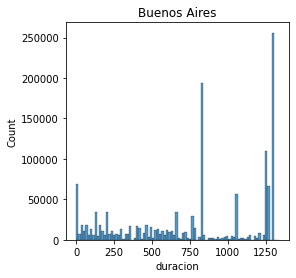

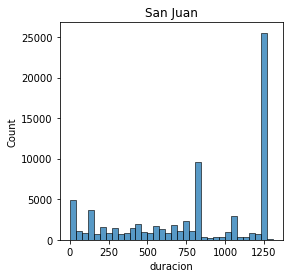

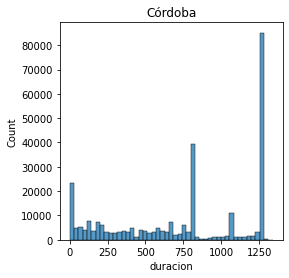

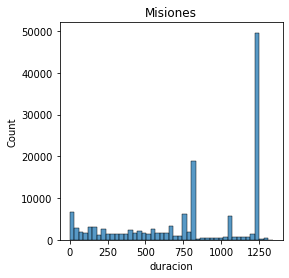

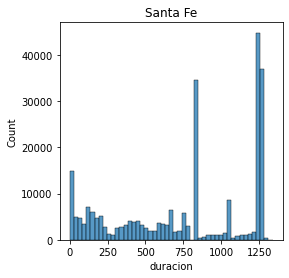

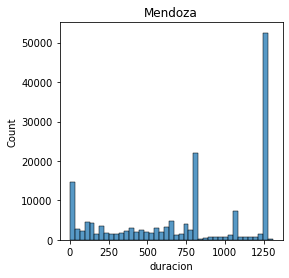

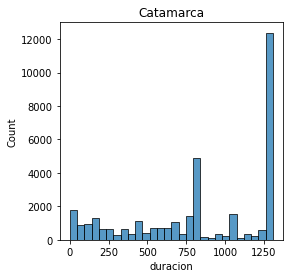

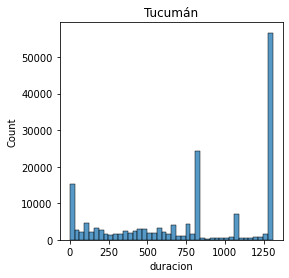

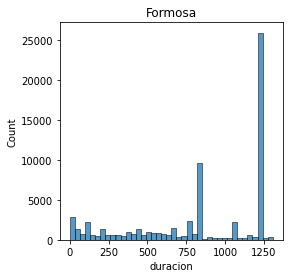

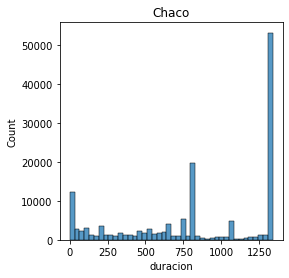

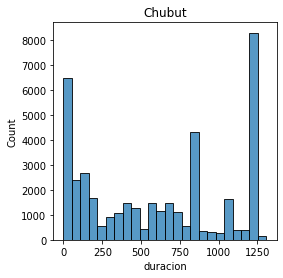

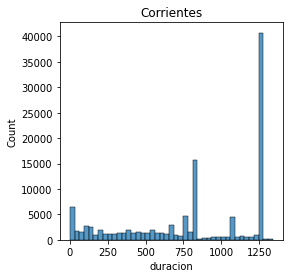

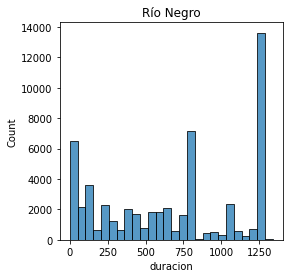

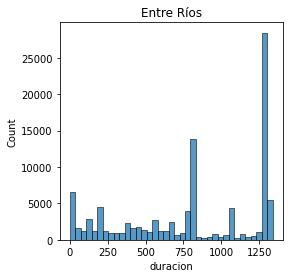

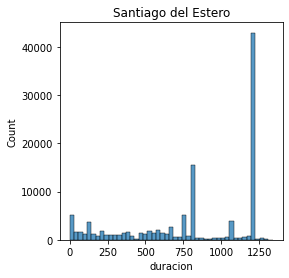

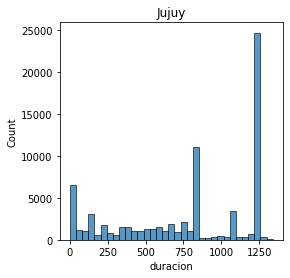

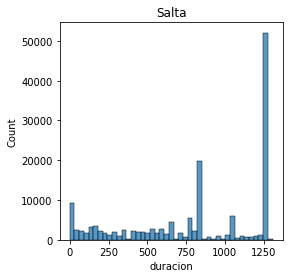

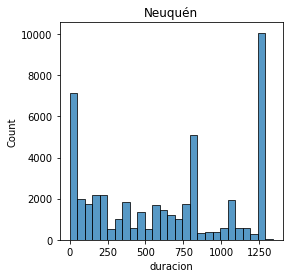

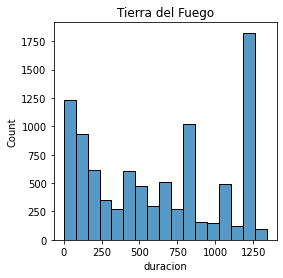

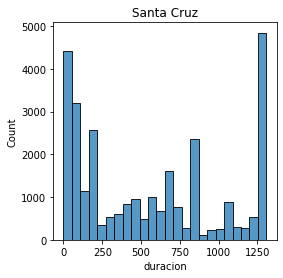

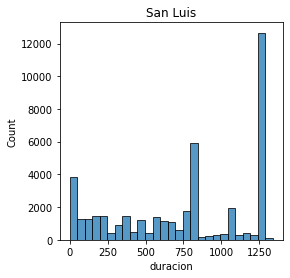

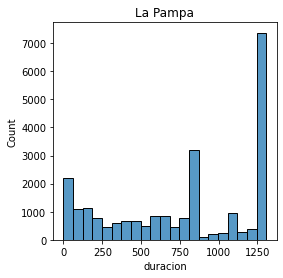

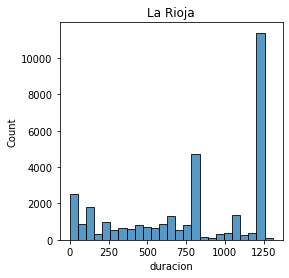

In [24]:
#Ploteamos histogramas
import matplotlib.pyplot as plt

for p in df['provincia'].unique():
    query = 'provincia == "{x}"'.format(x=p)
    query_res = df.query(query)
    plt.figure(figsize=(4,4))
    sns.histplot(x = query_res['duracion'], stat = "count").set(title=p)

Se puede ver una tendencia de picos en la cantidad de asignaciones que duran al rededor de 1250 días para todas las provincias por igual que es determinante en la configuración de los cuartiles para los boxplot, es por esto que el tercer cuartil en la mayoría de los casos está tan cerca del límite máximo de duraciones registradas. Una de las conclusiones es que la mayor cantidad de asignaciones dura al rededor de 1250 días y que en las provincias de la Patagonia también hay picos en la cantidad de asignaciones que duran menos de 250 días, predominantemente al rededor de los 50 días. También se puede ver otro pico en la cantidad de asignaciones de al rededor de 800 días en todas las provincias.

####c. Sexo vs. Provincia
(Variable Nominal vs Variable Nominal)

In [25]:
"""
Para este análisis vamos a utilizar Tabla de contingencia, Prueba de Chi Cuadrado y Grafico de barras apiladas.
"""

#Tabla de Contingencia
df.groupby(['provincia','sexo']).size()

data_crosstab = pd.crosstab(df['provincia'], df['sexo'], margins = False)
print(data_crosstab)

sexo                          F       M  X
provincia                                 
Buenos Aires            1221443  151785  4
Catamarca                 32641    2287  0
Chaco                    134941   10504  1
Chubut                    34564    6211  0
Ciudad de Buenos Aires   110412   16400  1
Corrientes               105379    9919  0
Córdoba                  255156   30650  1
Entre Ríos                91070   10175  0
Formosa                   60727    5204  0
Jujuy                     67837    6186  0
La Pampa                  21336    2406  0
La Rioja                  30331    2929  0
Mendoza                  146549   20090  0
Misiones                 125590   15999  0
Neuquén                   42117    6312  0
Río Negro                 47571    7933  0
Salta                    135655   14426  0
San Juan                  66688    7837  0
San Luis                  38065    4938  0
Santa Cruz                24333    4917  0
Santa Fe                 224349   29576  0
Santiago de

In [26]:
#Prueba de Chi Cuadrado
from scipy.stats import chi2_contingency

#data_crosstabTOT = pd.crosstab(df['provincia'], df['sexo'], margins = True)
#print(data_crosstabTOT)

stat, p, dof, expected = chi2_contingency(data_crosstab)


# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


La prueba de Chi nos indica que las variables de sexo y provincia son dependientes.

In [27]:
#Seteamos variables para el gráfico de barras apiladas
p_groups = df['provincia'].unique()
s_groups = df['sexo'].unique()
groups_of_values = [[],[],[]]
groups_of_values_100 = [[],[],[]]
for p in p_groups:
    query = 'provincia == "{x}"'.format(x=p)
    query_res = df.query(query)
    total_p = len(query_res.value_counts())
    for i, s in enumerate(df['sexo'].unique()):
        query2 = 'sexo == "{x}"'.format(x=s)
        query_res2 = query_res.query(query2)
        if i == 2 and len(query_res2.values) == 0:
            groups_of_values[i].append(0)
            groups_of_values_100[i].append(0)
        else:
            groups_of_values[i] += query_res2.sexo.value_counts().values.tolist()
            groups_of_values_100[i] += (query_res2.sexo.value_counts().values/total_p).tolist()

<AxesSubplot:>

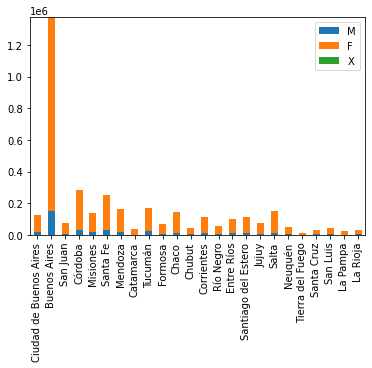

In [28]:
# Ploteamos grafico de barras apiladas
plot_df = pd.DataFrame(groups_of_values, index=s_groups).T
plot_df = plot_df.set_axis(df['provincia'].unique().tolist(), axis=0)
plot_df.plot.bar(stacked=True)

<AxesSubplot:>

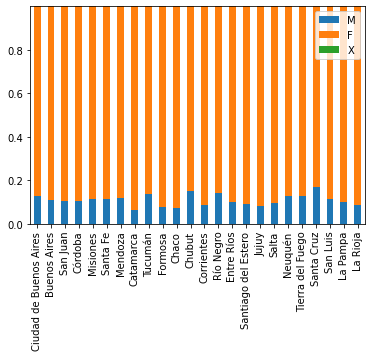

In [29]:
# Plotear grafico de barras apiladas para ver porcentajes de genero por provincia
plot_df = pd.DataFrame(groups_of_values_100, index=s_groups).T
plot_df = plot_df.set_axis(df['provincia'].unique().tolist(), axis=0)
plot_df.plot.bar(stacked=True)

La conclusión directa que se desprende de este grafico de barras es que el territorio que recibe una mayor cantidad de asignaciones es la provincia de Buenos Aires.
Por otro lado la distribución entre sexos en porcentaje se mantiene similar para todas las provincias.

[texto del vínculo](https://)### f) ¿Cuáles son los elementos que más le llaman la atención?